In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../Data/parkinsons.data')

In [3]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### Since our data has no categorical features there will be no need to do any encoding for specific features. The data is already numerical so I will go right to Standard Scaling and feature selection for use in my models.

In [4]:
X = df.drop(['status', 'name'], axis=1)
y = df['status']

In [5]:
# initialize
ss = StandardScaler()

# fit
X_ss = pd.DataFrame(ss.fit_transform(X),
                          columns = X.columns,
                          index = X.index)

In [6]:
X_ss.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,0.739536,...,0.332985,0.607532,-0.067893,-0.193225,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886
1,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,1.768464,...,1.159454,1.548254,-0.137843,-0.634508,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605
2,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,1.027636,...,0.699187,1.175323,-0.291633,-0.279760,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661
3,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396,1.207698,...,0.806859,1.340229,-0.280719,-0.281346,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954
4,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448,1.552389,...,1.216839,1.899461,-0.178026,-0.506745,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082


### For feature selection I am choosting to use SelectKBest to pick our top 10 features to use in modeling

In [7]:
# Create and fit selector
selector = SelectKBest(k=10)
selector.fit(X_ss, y)

# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)

# Creating the dataframe with columns chosen by SelectKBest
X_feat_select = X_ss.iloc[:,cols]

# Also creating a dataframe with the columns not chose, for use in PCA
removed = [c for c in X_ss.columns if c not in X_feat_select.columns]
X_feat_removed = X_ss.loc[:,removed]



### So we dont entirely lose the signal for the remaining features, I will be using PCA to reduce down the 5 additional features.

In [8]:
pca = PCA(n_components=5).fit(X_feat_removed)

for i, l in enumerate(pca.explained_variance_[:5]):
    print('PC {}: {:.2f} --> {:.2f}%'.format(i, l,
                                             l * 100 / sum(pca.explained_variance_)))



PC 0: 7.44 --> 65.37%
PC 1: 1.52 --> 13.32%
PC 2: 1.05 --> 9.18%
PC 3: 0.80 --> 6.99%
PC 4: 0.58 --> 5.13%


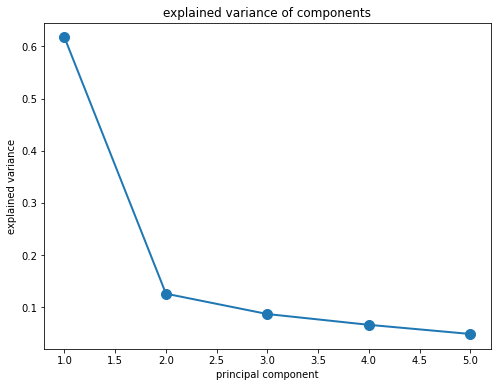

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,6), pca.explained_variance_ratio_[:5], lw=2)
ax.scatter(range(1, 6), pca.explained_variance_ratio_[:5], s=100)
ax.set_title('explained variance of components')
ax.set_xlabel('principal component')
ax.set_ylabel('explained variance');

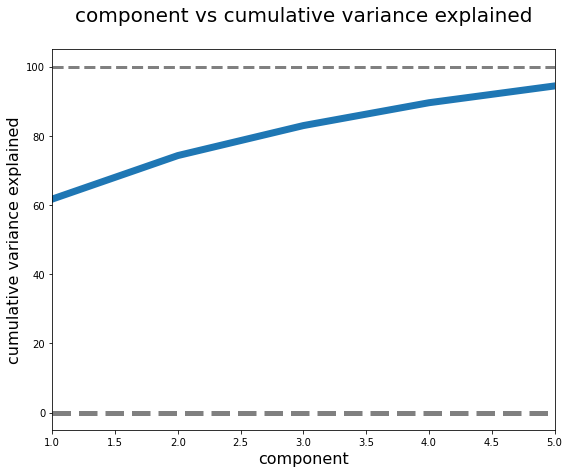

In [10]:
cum_var_exp = np.cumsum(pca.explained_variance_ratio_) * 100
plt.figure(figsize=(9,7))
component_number = range(1, 6)
plt.plot(component_number, cum_var_exp, lw=7)
plt.axhline(y=0, linewidth=5, color='grey', ls='dashed')
plt.axhline(y=100, linewidth=3, color='grey', ls='dashed')
ax = plt.gca()
ax.set_xlim([1,5])
ax.set_ylim([-5,105])
ax.set_ylabel('cumulative variance explained', fontsize=16)
ax.set_xlabel('component', fontsize=16)  
ax.set_title('component vs cumulative variance explained\n', fontsize=20);

In [11]:
pca_df = pd.DataFrame(pca.transform(X_feat_removed),
                      columns=['pc_' + str(i) for i in range(5)])
pca_df.head()

,pc_0,pc_1,pc_2,pc_3,pc_4
0,0.963627,-1.774728,0.985687,-0.817591,0.230976
1,2.340352,-1.969915,0.430976,-1.403921,0.511082
2,2.390595,-2.283335,1.021088,-0.875077,0.240142
3,2.289725,-2.123818,0.755570,-1.101615,0.324169
4,3.661630,-2.394818,1.184476,-1.054083,0.507108


In [12]:
X_final = pd.concat([X_feat_select,pca_df],axis=1)
X_final.head()

,MDVP:Fo(Hz),MDVP:Flo(Hz),MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ5,MDVP:APQ,HNR,spread1,spread2,PPE,pc_0,pc_1,pc_2,pc_3,pc_4
0,-0.829300,-0.952037,0.745985,0.739536,1.119147,0.332985,-0.193225,0.801323,0.480477,0.868886,0.963627,-1.774728,0.985687,-0.817591,0.230976
1,-0.770972,-0.057721,1.681731,1.768464,2.276504,1.159454,-0.634508,1.479853,1.311185,1.803605,2.340352,-1.969915,0.430976,-1.403921,0.511082
2,-0.909476,-0.109875,1.202693,1.027636,1.726176,0.699187,-0.279760,1.141445,1.017682,1.402661,2.390595,-2.283335,1.021088,-0.875077,0.240142
3,-0.909622,-0.114229,1.340396,1.207698,1.848749,0.806859,-0.281346,1.440945,1.293840,1.806954,2.289725,-2.123818,0.755570,-1.101615,0.324169
4,-0.925657,-0.130608,1.836448,1.552389,2.532491,1.216839,-0.506745,1.780940,0.096195,2.267082,3.661630,-2.394818,1.184476,-1.054083,0.507108


### Our final dataset consists of top 10 features chosen by SelectKBest and 5 PCA features, all of which was previously Standard Scaled. 

In [13]:
# exporting pre-processsed csv for use in modeling 
X_final.to_csv('../Data/X_final.csv', index=False)

To --> [03_Modeling](./03_Modeling.ipynb) notebook